Tackle Noise with error correction

In [16]:
from qiskit import QuantumCircuit, Aer, transpile,assemble
from qiskit.visualization import plot_histogram
from qiskit.ignis.mitigation import CompleteMeasFitter, complete_meas_cal, tensored_meas_cal

In [5]:
qc=QuantumCircuit(3,3)

In [6]:
qc.h(0)
qc.cx(0,1)
qc.cx(0,2)
qc.measure([0,1,2],[0,1,2])

In [14]:
backend=Aer.get_backend('qasm_simulator')
transpiled_qc=transpile(qc,backend)

In [27]:
qobj=assemble(transpiled_qc,shots=1000)
job=backend.run(qc)
result=job.result()
counts=result.get_counts()
raw_counts=job.result().get_counts()

In [30]:
cal_circuits,state_labels=complete_meas_cal(qubit_list=range(3))
cal_job=backend.run(qc)
cal_results=cal_job.result()
meas_fitter=CompleteMeasFitter(cal_results,state_labels)
mitigated_counts=meas_fitter.filter.apply(raw_counts)

In [31]:
print("Original counts:")
print(counts)

Original counts:
{'111': 505, '000': 519}


In [32]:
print("Mitigated counts:")
print(mitigated_counts)

Mitigated counts:
{'000': 127.89152636650826, '001': 128.07238277372198, '010': 127.9917974796466, '011': 128.1372408556412, '100': 127.9695194860783, '101': 127.9257164098645, '110': 127.91618449277475, '111': 128.09563213576428}


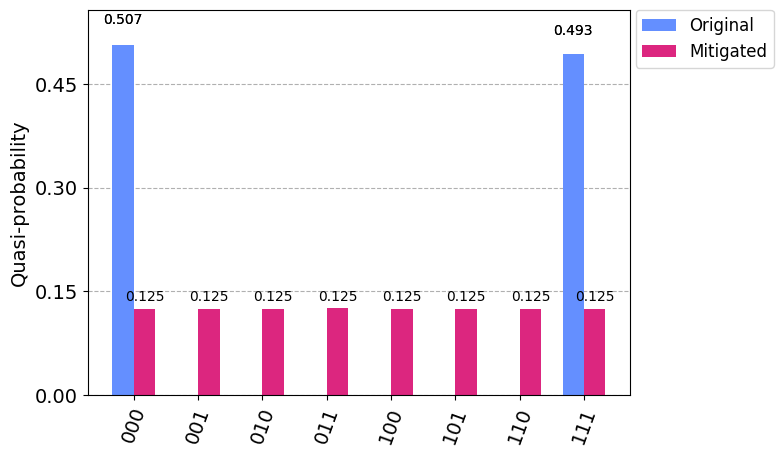

In [33]:
plot_histogram([counts, mitigated_counts], legend=['Original', 'Mitigated'])